In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
train_df = pd.read_csv("titanic/train.csv", index_col=0)
train_df.shape

(891, 11)

In [40]:
test_df = pd.read_csv("titanic/test.csv", index_col=0)
test_df.shape

(418, 10)

In [41]:
test_target_df = pd.read_csv("titanic/gender_submission.csv", index_col=0)
test_target_df.shape

(418, 1)

In [42]:
train_df.keys()

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [43]:
test_df.keys()

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [44]:
# Y
target_df = train_df["Survived"]
# X
features_df = train_df.drop("Survived", axis=1)

target_df.keys(), features_df.keys()


(Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
        ...
        882, 883, 884, 885, 886, 887, 888, 889, 890, 891],
       dtype='int64', name='PassengerId', length=891),
 Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
        'Cabin', 'Embarked'],
       dtype='object'))

In [45]:
train_df.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


Crearea unei coloane in Pandas

In [46]:
features_df["Gen"] = features_df['Sex'] == 'male'

In [47]:
features_df.head(2)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gen
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False


In [48]:
from sklearn.preprocessing import LabelBinarizer

binarizer = LabelBinarizer()
features_df["Gen"] =  binarizer.fit_transform(features_df['Sex'])

In [49]:
features_df.drop("Sex", axis=1, inplace=True)

In [51]:
features_df.head(2)

,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gen
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0


In [52]:
features_df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

# C = Cherbourg, Q = Queenstown, S = Southampton

In [53]:
features_df[features_df["Embarked"].isna()]

,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gen
PassengerId,,,,,,,,,,
62,1,"Icard, Miss. Amelie",38.0,0,0,113572,80.0,B28,NaN,0
830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",62.0,0,0,113572,80.0,B28,NaN,0


In [57]:
features_df[features_df["Cabin"].isna()]


,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gen
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
3,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
5,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1
6,3,"Moran, Mr. James",NaN,0,0,330877,8.4583,NaN,Q,1
8,3,"Palsson, Master. Gosta Leonard",2.0,3,1,349909,21.0750,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...
885,3,"Sutehall, Mr. Henry Jr",25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,1
886,3,"Rice, Mrs. William (Margaret Norton)",39.0,0,5,382652,29.1250,NaN,Q,0
887,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S,1


In [58]:
features_df["Cabin"].nunique()

147

In [61]:
features_df["Cabin"].isna().size

891

In [63]:

def first_letter( row):
    return str(row["Cabin"])[0].upper()

features_df['Cabin_short'] = features_df.apply(first_letter, axis=1)
features_df.head(2)


,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gen,Cabin_short
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1,N
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0,C


In [66]:
features_df['Cabin_short'] = features_df["Cabin"].astype(str).str[0].str.upper()
features_df.head(3)

,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gen,Cabin_short
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1,N
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0,C
3,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,N


In [67]:
features_df["Cabin_short"].unique(), features_df["Cabin_short"].nunique()

(array(['N', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object), 9)

In [68]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder

LabelEncoder()

In [70]:
features_df["Cabin"] = label_encoder.fit_transform(features_df["Cabin_short"])

In [73]:
features_df["Embarked_encoded"] = label_encoder.fit_transform(features_df["Embarked"])
features_df.head(2)

,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gen,Cabin_short,Embarked_encoded
PassengerId,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,7,S,1,N,2
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,2,C,0,C,0


In [75]:
features_df.drop(["Cabin_short", "Embarked", "Ticket", "Name"], axis=1, inplace=True)
features_df.head(3)

,Pclass,Age,SibSp,Parch,Fare,Cabin,Gen,Embarked_encoded
PassengerId,,,,,,,,
1,3,22.0,1,0,7.2500,7,1,2
2,1,38.0,1,0,71.2833,2,0,0
3,3,26.0,0,0,7.9250,7,0,2


In [76]:
features_df.rename(columns={"Embarked_encoded":"Embarked"}, inplace=True)

In [77]:
features_df

,Pclass,Age,SibSp,Parch,Fare,Cabin,Gen,Embarked
PassengerId,,,,,,,,
1,3,22.0,1,0,7.2500,7,1,2
2,1,38.0,1,0,71.2833,2,0,0
3,3,26.0,0,0,7.9250,7,0,2
4,1,35.0,1,0,53.1000,2,0,2
5,3,35.0,0,0,8.0500,7,1,2
...,...,...,...,...,...,...,...,...
887,2,27.0,0,0,13.0000,7,1,2
888,1,19.0,0,0,30.0000,1,0,2
889,3,NaN,1,2,23.4500,7,0,2


In [78]:
features_df.corr()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Gen,Embarked
Pclass,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.742093,0.131900,0.157112
Age,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.267161,0.093254,-0.025252
SibSp,0.083081,-0.308247,1.000000,0.414838,0.159651,0.041058,-0.114631,0.066654
Parch,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.031553,-0.245489,0.038322
Fare,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.525742,-0.182333,-0.221226
Cabin,0.742093,-0.267161,0.041058,-0.031553,-0.525742,1.000000,0.118635,0.191973
Gen,0.131900,0.093254,-0.114631,-0.245489,-0.182333,0.118635,1.000000,0.104057
Embarked,0.157112,-0.025252,0.066654,0.038322,-0.221226,0.191973,0.104057,1.000000


In [79]:
import seaborn as sns

<Axes: >

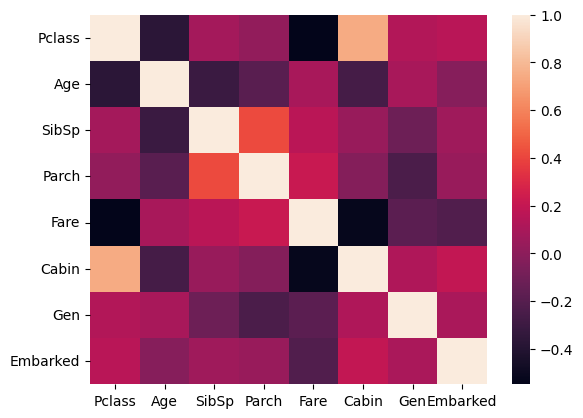

In [80]:
sns.heatmap(features_df.corr())

<Axes: >

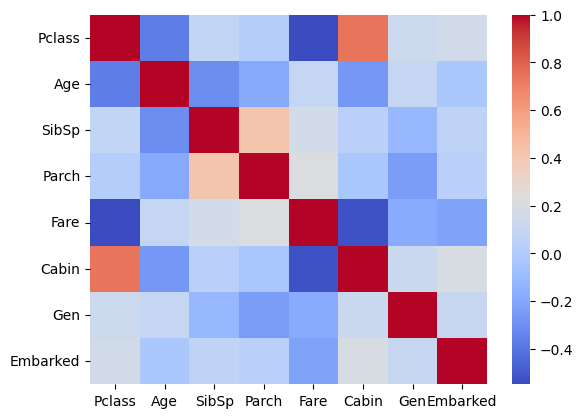

In [81]:
sns.heatmap(features_df.corr(), cmap="coolwarm")

In [82]:
features_df[features_df["Age"].isna()]

,Pclass,Age,SibSp,Parch,Fare,Cabin,Gen,Embarked
PassengerId,,,,,,,,
6,3,NaN,0,0,8.4583,7,1,1
18,2,NaN,0,0,13.0000,7,1,2
20,3,NaN,0,0,7.2250,7,0,0
27,3,NaN,0,0,7.2250,7,1,0
29,3,NaN,0,0,7.8792,7,0,1
...,...,...,...,...,...,...,...,...
860,3,NaN,0,0,7.2292,7,1,0
864,3,NaN,8,2,69.5500,7,0,2
869,3,NaN,0,0,9.5000,7,1,2


In [83]:
features_df["Age_df"] = features_df["Age"].fillna(features_df["Age"].mean())

In [85]:
features_df[features_df["Age"].isna()]

,Pclass,Age,SibSp,Parch,Fare,Cabin,Gen,Embarked,Age_df
PassengerId,,,,,,,,,
6,3,NaN,0,0,8.4583,7,1,1,29.699118
18,2,NaN,0,0,13.0000,7,1,2,29.699118
20,3,NaN,0,0,7.2250,7,0,0,29.699118
27,3,NaN,0,0,7.2250,7,1,0,29.699118
29,3,NaN,0,0,7.8792,7,0,1,29.699118
...,...,...,...,...,...,...,...,...,...
860,3,NaN,0,0,7.2292,7,1,0,29.699118
864,3,NaN,8,2,69.5500,7,0,2,29.699118
869,3,NaN,0,0,9.5000,7,1,2,29.699118


In [87]:
from sklearn.impute import SimpleImputer

simple_imputer = SimpleImputer(strategy = "mean")
features_df["Age_sk"] = simple_imputer.fit_transform(features_df[["Age"]])
features_df[features_df["Age"].isna()]

,Pclass,Age,SibSp,Parch,Fare,Cabin,Gen,Embarked,Age_df,Age_sk
PassengerId,,,,,,,,,,
6,3,NaN,0,0,8.4583,7,1,1,29.699118,29.699118
18,2,NaN,0,0,13.0000,7,1,2,29.699118,29.699118
20,3,NaN,0,0,7.2250,7,0,0,29.699118,29.699118
27,3,NaN,0,0,7.2250,7,1,0,29.699118,29.699118
29,3,NaN,0,0,7.8792,7,0,1,29.699118,29.699118
...,...,...,...,...,...,...,...,...,...,...
860,3,NaN,0,0,7.2292,7,1,0,29.699118,29.699118
864,3,NaN,8,2,69.5500,7,0,2,29.699118,29.699118
869,3,NaN,0,0,9.5000,7,1,2,29.699118,29.699118


In [89]:
features_df["Age"] = features_df["Age_sk"]
features_df.drop(["Age_sk", "Age_df"], axis=1)

,Pclass,Age,SibSp,Parch,Fare,Cabin,Gen,Embarked
PassengerId,,,,,,,,
1,3,22.000000,1,0,7.2500,7,1,2
2,1,38.000000,1,0,71.2833,2,0,0
3,3,26.000000,0,0,7.9250,7,0,2
4,1,35.000000,1,0,53.1000,2,0,2
5,3,35.000000,0,0,8.0500,7,1,2
...,...,...,...,...,...,...,...,...
887,2,27.000000,0,0,13.0000,7,1,2
888,1,19.000000,0,0,30.0000,1,0,2
889,3,29.699118,1,2,23.4500,7,0,2


In [92]:
plt.rcParams["figure.figsize"] 

[6.4, 4.8]

In [93]:
plt.rcParams["figure.figsize"] = (3.2, 2.4)

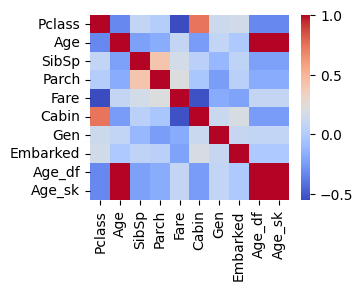

In [94]:
sns.heatmap(features_df.corr(), cmap="coolwarm");

In [114]:
from sklearn.feature_selection import SelectKBest, f_classif

In [115]:
selector = SelectKBest(score_func=f_classif, k=5) # pastram cele mai bune 5 coloane

In [117]:
selected_features_df = selector.fit_transform(features_df, target_df)
pd.DataFrame(selected_features_df) 

,0,1,2,3,4
0,3.0,7.2500,7.0,1.0,2.0
1,1.0,71.2833,2.0,0.0,0.0
2,3.0,7.9250,7.0,0.0,2.0
3,1.0,53.1000,2.0,0.0,2.0
4,3.0,8.0500,7.0,1.0,2.0
...,...,...,...,...,...
886,2.0,13.0000,7.0,1.0,2.0
887,1.0,30.0000,1.0,0.0,2.0
888,3.0,23.4500,7.0,0.0,2.0
889,1.0,30.0000,2.0,1.0,0.0


In [118]:
selected_columns = features_df.columns[selector.get_support()]
selected_columns

Index(['Pclass', 'Fare', 'Cabin', 'Gen', 'Embarked'], dtype='object')

In [120]:
selected_features_df  = pd.DataFrame(selected_features_df, columns=selected_columns)
selected_features_df.head(2)

,Pclass,Fare,Cabin,Gen,Embarked
0,3.0,7.2500,7.0,1.0,2.0
1,1.0,71.2833,2.0,0.0,0.0


<Axes: >

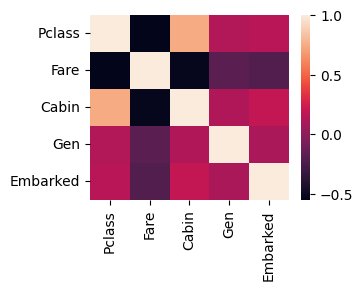

In [121]:
sns.heatmap(selected_features_df.corr())

<Axes: >

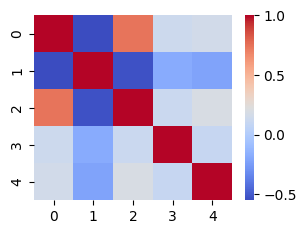

In [105]:
sns.heatmap(selected_features_df.corr(),  cmap="coolwarm")

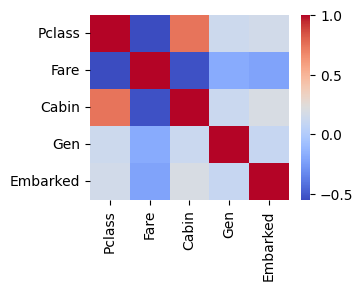

In [123]:
sns.heatmap(selected_features_df.corr(), cmap="coolwarm");

# Creare de modele

In [124]:
from sklearn.neighbors import KNeighborsClassifier

In [125]:
model = KNeighborsClassifier()
model

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [132]:
selected_features_df.keys()

Index(['Pclass', 'Fare', 'Cabin', 'Gen', 'Embarked'], dtype='object')

In [136]:
selected_features_df["Embarked"].isna().sum()

np.int64(0)

In [137]:
model.fit(selected_features_df, target_df)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [138]:
import pickle

In [139]:
with open("model.pkl", "wb") as fwriter:
    pickle.dump(model, fwriter)

In [141]:
selected_features_df.head(1)

,Pclass,Fare,Cabin,Gen,Embarked
0,3.0,7.25,7.0,1.0,2.0


In [143]:
model.predict([[3.0,	7.25,	7.0,	1.0,	2.0]])

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])